In [2]:
# this notebook is used to process some public datasets and prepare for further usage

import os
from enum import Enum

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read datasets

### GPT-wiki-intro

https://huggingface.co/datasets/aadityaubhat/GPT-wiki-intro

Dataset for training models to classify human written vs GPT/ChatGPT generated text. This dataset contains Wikipedia introductions and GPT (Curie) generated introductions for 150k topics.

In [3]:
df_wiki = pd.read_csv('GPT-wiki-intro.csv')

In [4]:
df_wiki.head()

,id,url,title,wiki_intro,generated_intro,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,prompt_tokens,generated_text_tokens
0,63064638,https://en.wikipedia.org/wiki/Sexhow%20railway...,Sexhow railway station,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...,3,174,78,200 word wikipedia style introduction on 'Sexh...,"located in the town of Sexhow, on the Cumbria...",25,88
1,279621,https://en.wikipedia.org/wiki/Eti%C3%A4inen,Etiäinen,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an...",1,187,80,200 word wikipedia style introduction on 'Etiä...,"animate or inanimate, have a spirit or ""etiäi...",26,101
2,287229,https://en.wikipedia.org/wiki/Inverse%20functi...,Inverse function theorem,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc...",3,170,59,200 word wikipedia style introduction on 'Inve...,function theorem states that for every real-v...,26,65
3,26712375,https://en.wikipedia.org/wiki/Stepping%20on%20...,Stepping on Roses,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...,3,335,121,200 word wikipedia style introduction on 'Step...,and illustrated by Maki Fujii. The series fol...,26,150
4,38894426,https://en.wikipedia.org/wiki/Rob%20Bradley,Rob Bradley,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ...",2,170,136,200 word wikipedia style introduction on 'Rob ...,"29, 1973) is an American former professional ...",28,162


In [5]:
df_wiki.shape

(150000, 12)

### DeepfakeTextDetect

https://github.com/yafuly/DeepfakeTextDetect

The dataset consists of 447,674 human-written and machine-generated texts from a wide range of sources in the wild:

Human-written texts from 10 datasets covering a wide range of writing tasks, e.g., news article writing, story generation, scientific writing, etc.
Machine-generated texts generated by 27 mainstream LLMs from 7 sources, e.g., OpenAI, LLaMA, and EleutherAI, etc.
6 systematic testbeds with increasing wildness and detection difficulty.
2 wilder test sets: (1) texts collected from new datasets and generated by GPT-4; (2) paraphrased texts.

In [6]:
df_deepfake = pd.concat([
    pd.read_csv('deepfakedetect/train.csv'),
    pd.read_csv('deepfakedetect/valid.csv'),
    pd.read_csv('deepfakedetect/test.csv'),
], ignore_index=True)

In [7]:
df_deepfake.head()

,text,label,src
0,White girls very rarely date Asian men. Even i...,1,cmv_human
1,I am a 23 year old male Indian American male. ...,1,cmv_human
2,"Take three people, Persons A, B, and C. They l...",1,cmv_human
3,(A) Work part-time in high school; Then go to ...,1,cmv_human
4,When police introduce a new form of speed prev...,1,cmv_human


In [8]:
df_deepfake['label'].value_counts()

0    281824
1    150858
Name: label, dtype: int64

### TuringBench

https://huggingface.co/datasets/turingbench/TuringBench/tree/main

168,612 articles from 19 machine text-generators and 1 human

In [9]:
temp = []
for folder in os.listdir('./TuringBench'):
    for fname in ['test.csv', 'train.csv', 'valid.csv']:
        temp.append(pd.read_csv(f'TuringBench/{folder}/{fname}'))

df_turing = pd.concat(temp, ignore_index=True)

In [10]:
df_turing.head()

,Generation,label
0,the scheme seeks to generate regular income th...,human
1,stated asset allocation . assets . min ( % ) m...,human
2,"' fbi agent , the associated press reported mo...",gpt2_pytorch
3,' calls for an end to corruption in the countr...,gpt2_pytorch
4,burkini ? a wetsuit but there 's 'burk ' in it...,human


In [11]:
df_turing.drop_duplicates(inplace=True)
df_turing['label'].value_counts()

grover_base     10769
gpt2_pytorch    10769
xlm             10767
xlnet_base      10764
gpt2_xl         10223
fair_wmt20      10223
gpt1            10223
transfo_xl      10220
pplm_distil     10120
pplm_gpt2       10120
xlnet_large     10116
ctrl            10094
grover_mega      9927
gpt2_large       9927
fair_wmt19       9927
gpt2_medium      9927
gpt3             9927
grover_large     9927
gpt2_small       9926
human            9458
Name: label, dtype: int64

# Combine data

In [12]:
class DataSource(str, Enum):
    """Enum with source datasets used."""

    deepfake = "DeepfakeTextDetect"
    turing = "TuringBench"
    wiki = "GPT-wiki-intro"

In [13]:
df_wiki.loc[0]['wiki_intro']

"Sexhow railway station was a railway station built to serve the hamlet of Sexhow in North Yorkshire, England. The station was on the North Yorkshire and Cleveland's railway line between  and , which opened in 1857. The line was extended progressively until it met the Whitby & Pickering Railway at . Sexhow station was closed in 1954 to passengers and four years later to goods. The station was located  south of Stockton, and  west of Battersby railway station. History\nThe station was opened in April 1857, when the line from Picton was opened up as far as . Mapping shows the station to have had three sidings in the goods yard, coal drops and a crane. The main station buildings were on the westbound (Picton direction) side of the station. The station was south of the village that it served, and was actually in the parish of Carlton in Cleveland, which has led to speculation that it was named Sexhow to avoid confusion with  railway station, which was originally named Carlton."

In [14]:
df_wiki.loc[0]['generated_text']

' located in the town of Sexhow, on the Cumbrian Coast Line in North West England. The station was opened by the Lancashire and Yorkshire Railway on 7 October 1870. It was closed to passengers on 5 January 1950, and to goods on 12 May 1965. \n\nThe station building is now a private residence. There is a small amount of trackage remaining near the building, used currently by a local agricultural business.'

In [15]:
df_wiki.loc[0]['generated_intro']

'Sexhow railway station was a railway station located in the town of Sexhow, on the Cumbrian Coast Line in North West England. The station was opened by the Lancashire and Yorkshire Railway on 7 October 1870. It was closed to passengers on 5 January 1950, and to goods on 12 May 1965. \n\nThe station building is now a private residence. There is a small amount of trackage remaining near the building, used currently by a local agricultural business.'

In [16]:
df_wiki[df_wiki.apply(lambda x: x['generated_text'] not in x['generated_intro'], axis=1)]

,id,url,title,wiki_intro,generated_intro,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,prompt_tokens,generated_text_tokens


In [17]:
human = df_wiki[['wiki_intro']].rename(columns={'wiki_intro': 'text'})
human['generator'] = None
human['is_generated'] = 0
machine = df_wiki[['generated_intro']].rename(columns={'generated_intro': 'text'})
machine['generator'] = 'gpt4'
machine['is_generated'] = 1
df_wiki = pd.concat([human, machine], ignore_index=True)
df_wiki['source'] = DataSource.wiki.value

In [18]:
df_wiki

,text,generator,is_generated,source
0,Sexhow railway station was a railway station b...,None,0,GPT-wiki-intro
1,"In Finnish folklore, all places and things, an...",None,0,GPT-wiki-intro
2,"In mathematics, specifically differential calc...",None,0,GPT-wiki-intro
3,is a Japanese shōjo manga series written and i...,None,0,GPT-wiki-intro
4,"Robert Milner ""Rob"" Bradley, Jr. (born August ...",None,0,GPT-wiki-intro
...,...,...,...,...
299995,Randy Borum is a Professor and Coordinator of ...,gpt4,1,GPT-wiki-intro
299996,"Sa'och (, also, ""Sauch"") is an endangered, nuc...",gpt4,1,GPT-wiki-intro
299997,Philip C. Hanawalt (born 1931) is an American ...,gpt4,1,GPT-wiki-intro
299998,Vossius Gymnasium is a public gymnasium in the...,gpt4,1,GPT-wiki-intro


In [19]:
df_deepfake.head()

,text,label,src
0,White girls very rarely date Asian men. Even i...,1,cmv_human
1,I am a 23 year old male Indian American male. ...,1,cmv_human
2,"Take three people, Persons A, B, and C. They l...",1,cmv_human
3,(A) Work part-time in high school; Then go to ...,1,cmv_human
4,When police introduce a new form of speed prev...,1,cmv_human


In [20]:
df_deepfake['label'].value_counts()

0    281824
1    150858
Name: label, dtype: int64

In [21]:
assert list(df_deepfake['src'].apply(lambda x: 'human' in x)) == list(df_deepfake['label'].apply(lambda x: x == 1))

In [22]:
df_deepfake[df_deepfake['label'] == 0]['src'].value_counts().head(10)

xsum_machine_specified_gpt-3.5-trubo       1000
roct_machine_specified_gpt-3.5-trubo       1000
wp_machine_specified_gpt-3.5-trubo         1000
wp_machine_topical_text-davinci-003        1000
roct_machine_topical_text-davinci-002      1000
xsum_machine_continuation_t0_3b            1000
roct_machine_specified_text-davinci-003    1000
wp_machine_specified_text-davinci-003      1000
roct_machine_topical_gpt-3.5-trubo         1000
xsum_machine_topical_gpt-3.5-trubo         1000
Name: src, dtype: int64

trubo ))))

In [23]:
df_deepfake['label'] = (~df_deepfake['label'].astype(bool)).astype(int)
df_deepfake.rename(columns={'src': 'generator', 'label': 'is_generated'}, inplace=True)
df_deepfake['generator'] = 'various'  # TODO: extract model name
df_deepfake.loc[df_deepfake['is_generated'] == 0, 'generator'] = None
df_deepfake['source'] = DataSource.deepfake.value
df_deepfake

,text,is_generated,generator,source
0,White girls very rarely date Asian men. Even i...,0,None,DeepfakeTextDetect
1,I am a 23 year old male Indian American male. ...,0,None,DeepfakeTextDetect
2,"Take three people, Persons A, B, and C. They l...",0,None,DeepfakeTextDetect
3,(A) Work part-time in high school; Then go to ...,0,None,DeepfakeTextDetect
4,When police introduce a new form of speed prev...,0,None,DeepfakeTextDetect
...,...,...,...,...
432677,We consider the recovery of a source term f (x...,0,None,DeepfakeTextDetect
432678,"Self-supervised learning (SlfSL), aiming at le...",0,None,DeepfakeTextDetect
432679,Recurrent neural networks (RNNs) have achieved...,0,None,DeepfakeTextDetect
432680,Deep reinforcement learning (DRL) is a booming...,0,None,DeepfakeTextDetect


In [24]:
df_deepfake['is_generated'].value_counts()

1    281824
0    150858
Name: is_generated, dtype: int64

In [25]:
df_turing.rename(columns={'label': 'generator', 'Generation': 'text'}, inplace=True)
df_turing['is_generated'] = df_turing['generator'].apply(lambda x: x != 'human').astype(int)
df_turing.loc[df_turing['is_generated'] == 0, 'generator'] = None
df_turing['source'] = DataSource.turing.value
df_turing

,text,generator,is_generated,source
0,the scheme seeks to generate regular income th...,None,0,TuringBench
1,stated asset allocation . assets . min ( % ) m...,None,0,TuringBench
2,"' fbi agent , the associated press reported mo...",gpt2_pytorch,1,TuringBench
3,' calls for an end to corruption in the countr...,gpt2_pytorch,1,TuringBench
4,burkini ? a wetsuit but there 's 'burk ' in it...,None,0,TuringBench
...,...,...,...,...
483249,'how can you tax gurgaon without basics in pla...,gpt2_small,1,TuringBench
483250,'canada military survey finds 960 victims of s...,gpt2_small,1,TuringBench
483253,'sundaram rural india fund regular direct-divi...,gpt2_small,1,TuringBench
483254,india seeks south korean investment in infra s...,gpt2_small,1,TuringBench


In [26]:
data = pd.concat([df_wiki, df_deepfake, df_turing], ignore_index=True)
data

,text,generator,is_generated,source
0,Sexhow railway station was a railway station b...,None,0,GPT-wiki-intro
1,"In Finnish folklore, all places and things, an...",None,0,GPT-wiki-intro
2,"In mathematics, specifically differential calc...",None,0,GPT-wiki-intro
3,is a Japanese shōjo manga series written and i...,None,0,GPT-wiki-intro
4,"Robert Milner ""Rob"" Bradley, Jr. (born August ...",None,0,GPT-wiki-intro
...,...,...,...,...
936031,'how can you tax gurgaon without basics in pla...,gpt2_small,1,TuringBench
936032,'canada military survey finds 960 victims of s...,gpt2_small,1,TuringBench
936033,'sundaram rural india fund regular direct-divi...,gpt2_small,1,TuringBench
936034,india seeks south korean investment in infra s...,gpt2_small,1,TuringBench


In [27]:
data['is_generated'].value_counts()

1    625720
0    310316
Name: is_generated, dtype: int64

In [28]:
data.to_parquet('mgt_dataset.parquet')

# Small EDA

In [34]:
data['tokens'] = data['text'].apply(word_tokenize)

In [35]:
data['len_tokens'] = data['tokens'].apply(len)

In [36]:
data.head()

,text,generator,is_generated,source,tokens,len_tokens
0,Sexhow railway station was a railway station b...,None,0,GPT-wiki-intro,"[Sexhow, railway, station, was, a, railway, st...",188
1,"In Finnish folklore, all places and things, an...",None,0,GPT-wiki-intro,"[In, Finnish, folklore, ,, all, places, and, t...",222
2,"In mathematics, specifically differential calc...",None,0,GPT-wiki-intro,"[In, mathematics, ,, specifically, differentia...",184
3,is a Japanese shōjo manga series written and i...,None,0,GPT-wiki-intro,"[is, a, Japanese, shōjo, manga, series, writte...",372
4,"Robert Milner ""Rob"" Bradley, Jr. (born August ...",None,0,GPT-wiki-intro,"[Robert, Milner, ``, Rob, '', Bradley, ,, Jr.,...",198


In [41]:
data.to_parquet('mgt_dataset_tokenized.parquet')

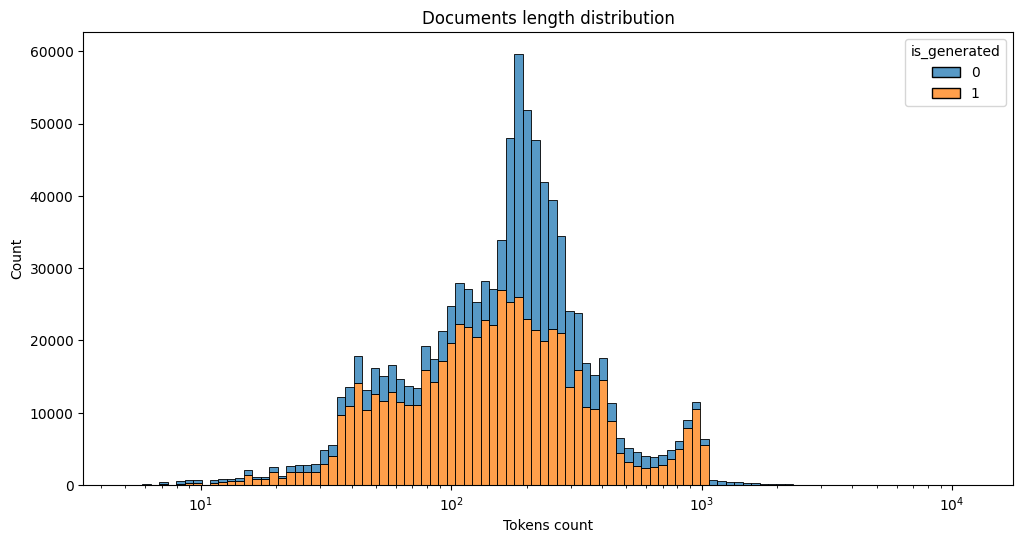

In [40]:
fig = plt.figure(figsize=(12, 6), dpi=100)
sns.histplot(data=data, x='len_tokens', hue='is_generated', bins=100, multiple='stack', log_scale=True).set(title='Documents length distribution', xlabel='Tokens count');